In [1]:
import geopandas as gpd
#https://stackoverflow.com/questions/56958421/pip-install-geopandas-on-windows

In [2]:
from pathlib import Path
from shapely import wkt
import pandas as pd
import matplotlib.pyplot as plt
from topojson import Topology
import altair as alt

In [3]:
def processLocation(df):
    """
    :params df: dataframe
    :params alias:columns alias thats in COL_MAP
    :params colstoset:keyss from LOCATION_COLS map
    """
    df['x'] = pd.Series(df['location']).str.extract(r'([-]*[0-9]+\.[0-9]+)')
    df['y'] = pd.Series(df['location']).str.extract(r'(\s[0-9]+\.[0-9]+)')
    df['y'] = pd.Series(df['y']).str.strip()
    df['x'] = df['x'].astype(float)
    df['y'] = df['y'].astype(float)
    return df

In [4]:
file_path = r'D:\Datasets\Projects\VAST Challenge\VAST-Challenge-2022\Datasets\Attributes'
df = pd.read_csv(Path(Path(file_path,'Buildings.csv')))
df_apartments = pd.read_csv(Path(Path(file_path,'Apartments.csv')))
df_apartments = processLocation(df_apartments)
df = df[['buildingId', 'location', 'buildingType']]

In [5]:
df['geometry'] = gpd.GeoSeries.from_wkt(df['location'])
df_apartments['geometry'] = gpd.GeoSeries.from_wkt(df_apartments['location']) 

In [6]:
gdf = gpd.GeoDataFrame(df,geometry='geometry')
gdf_apartments = gpd.GeoDataFrame(df_apartments,geometry='geometry')

In [7]:
df_apartments.drop('geometry',axis = 1,inplace=True)

In [8]:
gdf_Commercial = gdf.loc[gdf['buildingType'] == "Commercial"]
gdf_Residential = gdf.loc[gdf['buildingType'] == "Residental"]
gdf_School = gdf.loc[gdf['buildingType'] == "School"]

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


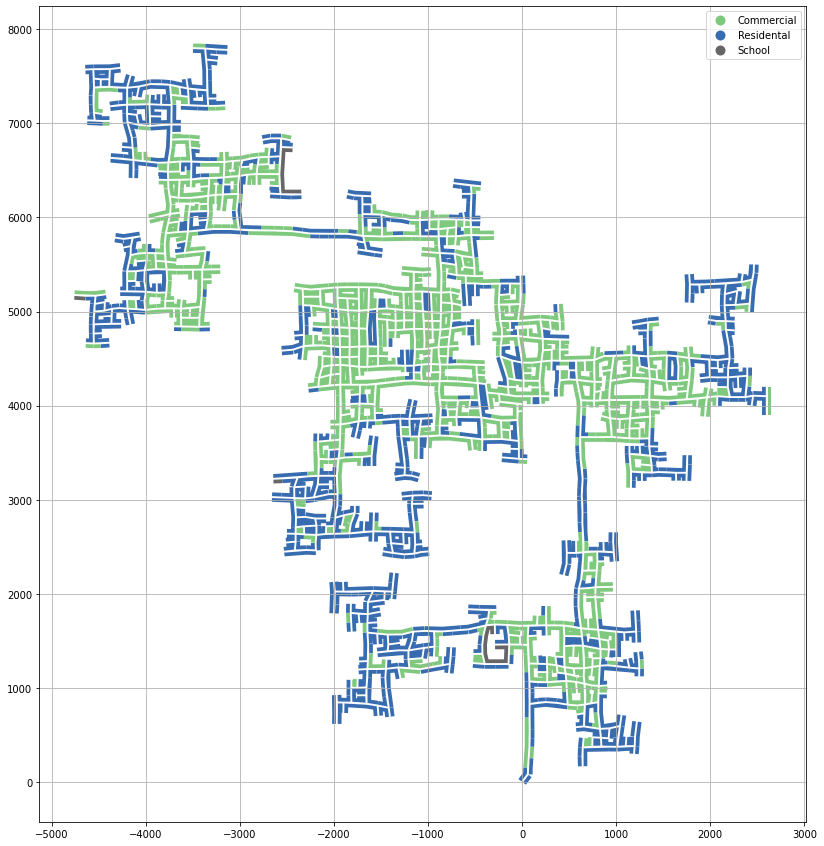

In [9]:
fig,ax = plt.subplots(1,1,figsize = (15,15))
# gdf_Commercial.plot(ax = ax, color = 'grey')
# gdf_Residential.plot(ax = ax, color = 'orange')
# gdf_School.plot(ax = ax, color = 'blue')
gdf.plot(column = 'buildingType',ax = ax,legend = True,colormap='Accent')
ax.grid()

# gdf.plot(ax = ax,color = 'orange')

In [10]:
# fig,ax = plt.subplots(1,1,figsize = (15,15))
var_topojson = Topology(gdf,prequantize=False).to_json()
var_topojson_apartments = Topology(gdf_apartments,prequantize=False).to_json()
# .topoquantize(1000).to_alt().properties(title='WITH Topoquantization',width = 1000,height = 1000)

In [11]:
var_topojson

'{"type":"Topology","objects":{"data":{"geometries":[{"properties":{"buildingId":1,"location":"POLYGON ((350.0638997002585 4595.665606173783, 390.0632568061789 4595.892390461278, 390.6810201497753 4486.933622371929, 323.6754997155391 4488.923908968658, 324.8980852269488 4595.180890652538, 350.0638997002585 4595.665606173783))","buildingType":"Commercial"},"type":"Polygon","arcs":[[0]],"id":0},{"properties":{"buildingId":2,"location":"POLYGON ((-1926.972613718425 2725.6106868067013, -1948.1911073943602 2730.2396710432536, -1950.043454710512 2689.3931580987587, -1927.961540927384 2690.2408271855193, -1926.4271717193399 2650.2702666298624, -1990.3291714251134 2647.817229711742, -1979.7291802700934 2799.382113824957, -1906.114239251982 2821.222005422068, -1926.972613718425 2725.6106868067013))","buildingType":"Residental"},"type":"Polygon","arcs":[[1]],"id":1},{"properties":{"buildingId":3,"location":"POLYGON ((685.6846002015491 1552.131491805318, 645.9984579654256 1547.1304804661822, 636.

In [12]:
var_topojson_apartments

'{"type":"Topology","objects":{"data":{"geometries":[{"properties":{"apartmentId":1,"rentalCost":768.16,"maxOccupancy ":2,"numberOfRooms":4,"location":"POINT (1077.6979444315298 648.4427163702453)","buildingId":340,"x":1077.6979444315298,"y":648.4427163702453},"type":"Point","coordinates":[1077.6979444315298,648.4427163702453],"id":0},{"properties":{"apartmentId":2,"rentalCost":1014.55,"maxOccupancy ":2,"numberOfRooms":1,"location":"POINT (-185.9292838076562 1520.3270983045118)","buildingId":752,"x":-185.9292838076562,"y":1520.3270983045118},"type":"Point","coordinates":[-185.9292838076562,1520.3270983045118],"id":1},{"properties":{"apartmentId":3,"rentalCost":1057.39,"maxOccupancy ":4,"numberOfRooms":3,"location":"POINT (2123.0141855392585 5126.753457243003)","buildingId":639,"x":2123.0141855392585,"y":5126.753457243003},"type":"Point","coordinates":[2123.0141855392585,5126.753457243003],"id":2},{"properties":{"apartmentId":4,"rentalCost":1259.1,"maxOccupancy ":4,"numberOfRooms":3,"lo

In [13]:
data_topojson = alt.InlineData(values = var_topojson,format = alt.DataFormat(feature = 'data',type = 'topojson'))
data_topojson_apartment = alt.InlineData(values = var_topojson_apartments,format = alt.DataFormat(feature = 'data',type = 'topojson'))

In [14]:
data_topojson_apartment

InlineData({
  format: DataFormat({
    feature: 'data',
    type: 'topojson'
  }),
  values: '{"type":"Topology","objects":{"data":{"geometries":[{"properties":{"apartmentId":1,"rentalCost":768.16,"maxOccupancy ":2,"numberOfRooms":4,"location":"POINT (1077.6979444315298 648.4427163702453)","buildingId":340,"x":1077.6979444315298,"y":648.4427163702453},"type":"Point","coordinates":[1077.6979444315298,648.4427163702453],"id":0},{"properties":{"apartmentId":2,"rentalCost":1014.55,"maxOccupancy ":2,"numberOfRooms":1,"location":"POINT (-185.9292838076562 1520.3270983045118)","buildingId":752,"x":-185.9292838076562,"y":1520.3270983045118},"type":"Point","coordinates":[-185.9292838076562,1520.3270983045118],"id":1},{"properties":{"apartmentId":3,"rentalCost":1057.39,"maxOccupancy ":4,"numberOfRooms":3,"location":"POINT (2123.0141855392585 5126.753457243003)","buildingId":639,"x":2123.0141855392585,"y":5126.753457243003},"type":"Point","coordinates":[2123.0141855392585,5126.753457243003],"id"

In [15]:
alt.Chart(data_topojson).mark_geoshape(
).encode(
    color="properties.buildingType:N"
).project(
    type='identity', reflectY=True
).properties(
    height = 750,width = 750
)

alt.Chart(...)

Apartment Plotting

In [16]:
background = alt.Chart(data_topojson).mark_geoshape(
         fill = 'white',
         stroke = 'black',
         strokeWidth = 1).project(
    type='identity', reflectY=True
).properties(
    height = 1000,width = 1000
)
points = alt.Chart(df_apartments).mark_circle(size = 15, fill = 'red').encode(longitude = 'x',latitude = 'y').properties(
    height = 1000,width = 1000
)
# #encode(
#     color="properties.buildingType:N"
# )
background + points

alt.LayerChart(...)

Rent Areas Visualized

In [24]:
import numpy as np
background = alt.Chart(data_topojson).mark_geoshape(
    fill = 'white',
    stroke = 'black',
    strokeWidth = 1
).project(
    type='identity', reflectY=True).properties(
    width = 1000,
    height = 1000
)
rent_visualized = alt.Chart(df_apartments).mark_circle().encode(
    longitude = 'x',latitude = 'y',size = 'rentalCost',tooltip = 'rentalCost',
    color = alt.Color('rentalCost',scale = alt.Scale(
    domain = list(np.linspace(int(df_apartments["rentalCost"].min()),int(df_apartments['rentalCost'].max()),3)),
    # domain = [-10,-5,0,5,9],
    range = ['beige','lightsalmon','darkred'],
    # interpolate = 'rgb'
    ),
    legend=alt.Legend(direction='vertical', orient='right', title='Rent Cost'))).properties(
    width = 1000,
    height = 1000
)
background + rent_visualized

alt.LayerChart(...)

In [18]:
df

buildingId                                           location  \
0              1  POLYGON ((350.0638997002585 4595.665606173783,...   
1              2  POLYGON ((-1926.972613718425 2725.610686806701...   
2              3  POLYGON ((685.6846002015491 1552.131491805318,...   
3              4  POLYGON ((-976.7845160060303 4542.38209636188,...   
4              5  POLYGON ((1259.3061988755617 3572.726728111263...   
...          ...                                                ...   
1037        1038  POLYGON ((361.2332515102781 4376.8840047388585...   
1038        1039  POLYGON ((1011.5463728925471 362.9701764035531...   
1039        1040  POLYGON ((-3562.8074734172264 7362.92295511692...   
1040        1041  POLYGON ((-4151.699758553839 5418.613349758049...   
1041        1042  POLYGON ((-1658.924569481752 4827.536640495573...   

     buildingType                                           geometry  
0      Commercial  POLYGON ((350.064 4595.666, 390.063 4595.892, ...  
1      Residental  POLYGON ((-1926.973 2725.611, -1948.191 2730.2...  
2      Commercial  POLYGON ((685.685 1552.131, 645.998 1547.130, ...  
3      Commercial  POLYGON ((-976.785 4542.382, -1053.288 4531.35...  
4      Residental  POLYGON ((1259.306 3572.727, 1299.255 3574.747...  
...           ...                                                ...  
1037   Residental  POLYGON ((361.233 4376.884, 390.521 4376.722, ...  
1038   Residental  POLYGON ((1011.546 362.970, 1011.169 322.972, ...  
1039   Residental  POLYGON ((-3562.807 7362.923, -3557.337 7294.1...  
1040   Commercial  POLYGON ((-4151.700 5418.613, -4116.226 5419.1...  
1041   Commercial  POLYGON ((-1658.925 4827.537, -1726.134 4830.6...  

[1042 rows x 4 columns]